In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
with open('/content/drive/MyDrive/PetImages/y_val.txt', 'r') as f:
    y_val = np.loadtxt(f)
print(y_val)
print(type(y_val))

[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.

In [ ]:
with open('/content/drive/MyDrive/PetImages/y_test.txt', 'r') as f:
    y_test = np.loadtxt(f)
with open('/content/drive/MyDrive/PetImages/y_train.txt', 'r') as f:
    y_train = np.loadtxt(f)

In [ ]:
print(len(y_train))

4000


In [ ]:
X_test = np.load('/content/drive/MyDrive/PetImages/X_test.npy')

In [ ]:
print(X_test.shape)

(500, 180, 180, 3)


In [ ]:
print(X_test[5,0,0,0])

0.4588235294117647


In [ ]:
print((X_test[5]))

[[[0.45882353 0.61568627 0.72941176]
  [0.45490196 0.61960784 0.73333333]
  [0.45098039 0.62352941 0.7372549 ]
  ...
  [0.34901961 0.5254902  0.84313725]
  [0.32941176 0.49803922 0.81960784]
  [0.33333333 0.49019608 0.81176471]]

 [[0.45882353 0.61568627 0.72941176]
  [0.45490196 0.61960784 0.73333333]
  [0.45098039 0.62352941 0.7372549 ]
  ...
  [0.33333333 0.50588235 0.82352941]
  [0.3254902  0.49019608 0.81176471]
  [0.31372549 0.47058824 0.79215686]]

 [[0.45882353 0.61568627 0.72941176]
  [0.45490196 0.61960784 0.73333333]
  [0.45098039 0.62352941 0.7372549 ]
  ...
  [0.31764706 0.47843137 0.78823529]
  [0.30196078 0.45882353 0.78039216]
  [0.2627451  0.41960784 0.74509804]]

 ...

 [[0.39215686 0.56470588 0.68627451]
  [0.39607843 0.56862745 0.69019608]
  [0.39607843 0.56862745 0.69019608]
  ...
  [0.35294118 0.61176471 0.69019608]
  [0.36078431 0.64313725 0.7254902 ]
  [0.36862745 0.6745098  0.76470588]]

 [[0.37647059 0.54901961 0.67058824]
  [0.38431373 0.55686275 0.67843137]


In [ ]:
X_train = np.load('/content/drive/MyDrive/PetImages/X_train.npy')
X_val = np.load('/content/drive/MyDrive/PetImages/X_val.npy')

In [ ]:
print(X_train.size)

388800000


In [ ]:
model = Sequential()
model.add(tf.keras.layers.Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
125/125 [==============================] - 12s 84ms/step - loss: 1.8016 - accuracy: 0.5008 - val_loss: 0.7364 - val_accuracy: 0.5080
Epoch 2/20
125/125 [==============================] - 10s 81ms/step - loss: 0.7218 - accuracy: 0.5543 - val_loss: 0.8382 - val_accuracy: 0.5400
Epoch 3/20
125/125 [==============================] - 10s 80ms/step - loss: 0.7741 - accuracy: 0.5470 - val_loss: 0.7669 - val_accuracy: 0.5260
Epoch 4/20
125/125 [==============================] - 10s 80ms/step - loss: 0.7541 - accuracy: 0.5452 - val_loss: 0.8241 - val_accuracy: 0.5380
Epoch 5/20
125/125 [==============================] - 10s 80ms/step - loss: 0.6982 - accuracy: 0.5713 - val_loss: 0.7127 - val_accuracy: 0.5640
Epoch 6/20
125/125 [==============================] - 12s 94ms/step - loss: 0.7011 - accuracy: 0.5353 - val_loss: 0.7019 - val_accuracy: 0.4700
Epoch 7/20
125/125 [==============================] - 10s 80ms/step - loss: 0.6927 - accuracy: 0.5175 - val_loss: 0.6951 - val_accuracy:

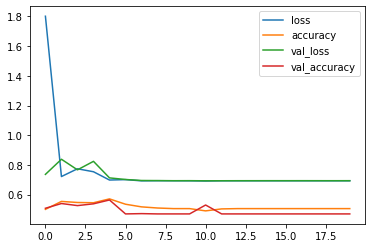

In [ ]:
lossData = pd.DataFrame(model.history.history)
lossData.plot()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [ ]:
X_train.shape

(4000, 180, 180, 3)

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(x=X_train, y=y_train, epochs=20, batch_size=25, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
160/160 [==============================] - 317s 2s/step - loss: 0.6895 - accuracy: 0.5390 - val_loss: 0.6828 - val_accuracy: 0.5560
Epoch 2/20
160/160 [==============================] - 317s 2s/step - loss: 0.6847 - accuracy: 0.5487 - val_loss: 0.6969 - val_accuracy: 0.5080
Epoch 3/20
160/160 [==============================] - 319s 2s/step - loss: 0.6822 - accuracy: 0.5523 - val_loss: 0.7058 - val_accuracy: 0.4700
Epoch 4/20
160/160 [==============================] - 316s 2s/step - loss: 0.6805 - accuracy: 0.5510 - val_loss: 0.6618 - val_accuracy: 0.6140
Epoch 5/20
160/160 [==============================] - 318s 2s/step - loss: 0.6618 - accuracy: 0.5888 - val_loss: 0.6424 - val_accuracy: 0.6540
Epoch 6/20
160/160 [==============================] - 316s 2s/step - loss: 0.6381 - accuracy: 0.6265 - val_loss: 0.6277 - val_accuracy: 0.6480
Epoch 7/20
160/160 [==============================] - 317s 2s/step - loss: 0.6127 - accuracy: 0.6555 - val_loss: 0.6381 - val_accuracy: 0.6140

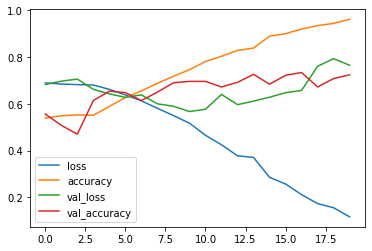

In [ ]:
lossData = pd.DataFrame(model2.history.history)
lossData.plot()

In [ ]:
model3 = Sequential()
model3.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(180, 180, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model3.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
125/125 [==============================] - 344s 3s/step - loss: 0.6871 - accuracy: 0.5770 - val_loss: 0.6575 - val_accuracy: 0.5620
Epoch 2/10
125/125 [==============================] - 338s 3s/step - loss: 0.6127 - accuracy: 0.6690 - val_loss: 0.6190 - val_accuracy: 0.6360
Epoch 3/10
125/125 [==============================] - 360s 3s/step - loss: 0.5778 - accuracy: 0.7045 - val_loss: 0.5824 - val_accuracy: 0.7060
Epoch 4/10
125/125 [==============================] - 334s 3s/step - loss: 0.5495 - accuracy: 0.7320 - val_loss: 0.5889 - val_accuracy: 0.6960
Epoch 5/10
125/125 [==============================] - 331s 3s/step - loss: 0.5331 - accuracy: 0.7487 - val_loss: 0.5929 - val_accuracy: 0.6880
Epoch 6/10
125/125 [==============================] - 333s 3s/step - loss: 0.4986 - accuracy: 0.7635 - val_loss: 0.5441 - val_accuracy: 0.7400
Epoch 7/10
125/125 [==============================] - 329s 3s/step - loss: 0.4684 - accuracy: 0.7820 - val_loss: 0.5376 - val_accuracy: 0.7360

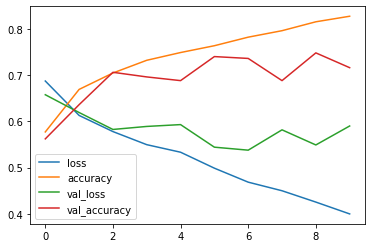

In [ ]:
lossData = pd.DataFrame(model3.history.history)
lossData.plot()